In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS
using Plots; gr();

  Activating environment at `~/Coding/julia/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1317


In [102]:
dd = IMAS.json2imas("/Users/meneghini/.julia/dev/FUSE/sample/CAT_eq_ods.json");
plot(dd.equilibrium.time_slice[1])
IMAS.flux_surfaces(dd.equilibrium);

In [105]:
ϵ = 0.32
κ = 1.7
δ = 0.3
R0 = 6.2
B0 = 5.3
ip = 15.E6
beta_n = 3.0
x_point=true
symmetric=true

resolution = 129

dd = IMAS.dd()
resize!(dd.equilibrium.time_slice,1)
FUSE.init(dd.equilibrium.time_slice[1]; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=x_point)

eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium.time_slice[1], symmetric=symmetric)
@time FUSE.step(eqactor)
dd.equilibrium.time_slice[1] = FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2),0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2));
dd.equilibrium.time=[0.0]
dd.equilibrium.vacuum_toroidal_field.r0=R0
dd.equilibrium.vacuum_toroidal_field.b0=[B0]

plot(dd.equilibrium.time_slice[1]);

  0.705563 seconds (5.83 M allocations: 322.198 MiB, 34.03% gc time)


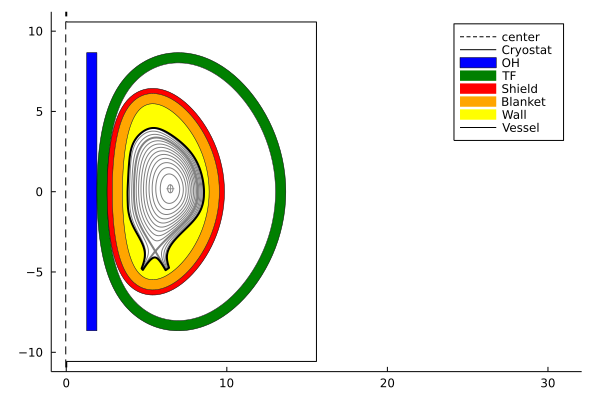

  0.000056 seconds (3 allocations: 224 bytes)


In [232]:
rb=IMAS.radial_build()
eqt=dd.equilibrium.time_slice[1]

rbactor = FUSE.init(rb, eqt, is_nuclear_facility=true,conformal_wall=true);
@time FUSE.step(rbactor)
dd.radial_build = FUSE.finalize(rbactor)

plot(eqt,color=:gray)
display(plot!(rb,outline=true))

In [6]:
rb;

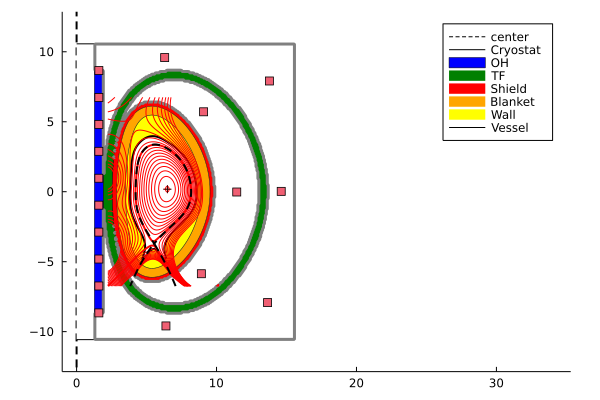

 * Status: failure (exceeded time limit of 30.0)

 * Candidate solution
    Final objective value:     7.039610e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   30  (vs limit 30)
    Iterations:    1763
    f(x) calls:    2689



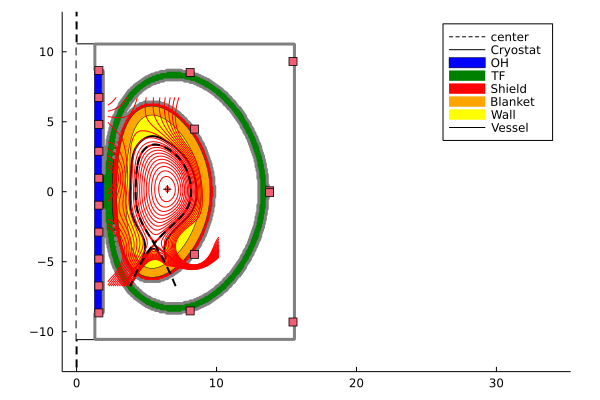

In [261]:
pfoptactor = PFcoilsOptActor(dd.equilibrium,dd.radial_build, 10, [3,5],1E-13);
plot(rb)
display(plot!(pfoptactor))

FUSE.step(pfoptactor, λ_currents=1E6, verbose=true, symmetric=true);
plot(rb)
display(plot!(pfoptactor))

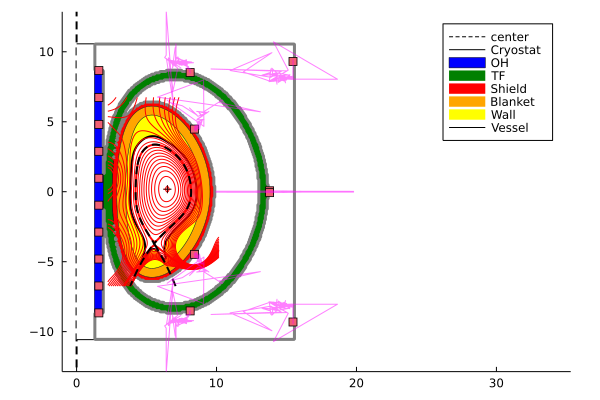

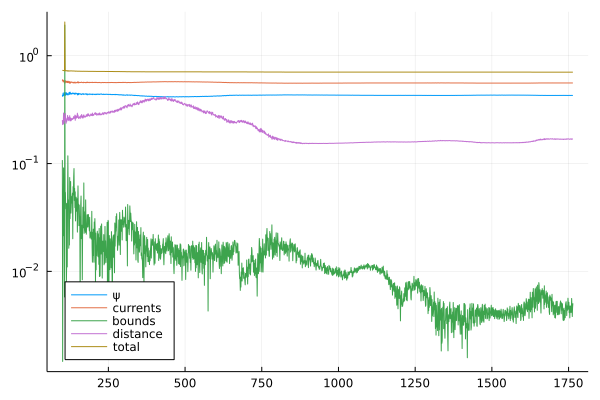

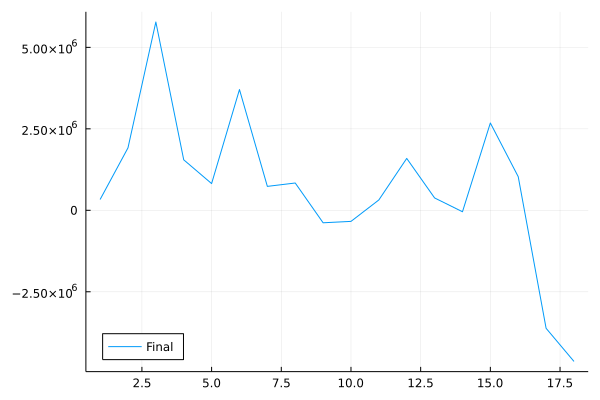

In [262]:
plot(rb)
display(plot!(pfoptactor,trace=true))

display(plot(pfoptactor.trace,:cost,start_at=100))
display(plot(pfoptactor.trace,:final_currents))

In [245]:
pfoptactor.λ_norm

1249.5455460055582